# Introduction to `pandas`

This workshop's goal&mdash;which is facilitated by this `Colab notebook`&mdash;is to give you the confidence to use the `pandas` library in your future projects. You can also explore some of the functionality of the markup language in all the non-code cells like this one, which will allow you to generate presentations using the your own code and its output. Basic familiarity with Python *is* assumed as you should have already completed the first 3 initial projects.

The `pandas` library has been designed to facilitate the work with structured data. Most of the analyses you might perform will likely involve using tabular data, e.g., from Excel files, .csv files or relational databases (e.g., SQL). The `DataFrame` object in `pandas` is "a two-dimensional tabular, column-oriented data structure with both row and column labels." We will also take a look at `panas` `Series`, which is the one-dimensional version of the `DataFrame`, which means that is just a vector or a column of data. 

If you're curious:

>The `pandas` name itself is derived from *panel data*, an econometrics term for multidimensional structured data sets, and *Python data analysis* itself. After getting introduced, you can consult the full [`pandas` documentation](http://pandas.pydata.org/pandas-docs/stable/).

To motivate this workshop, we'll work with example data and go through the various steps you might need to prepare data for analysis. You'll realize that doing this type of work with large amounts of data is much more easier with `pandas` rather than using the Python's built-in data structures that we saw in the previous workshops like `lists` or `dictionaries`.

### Table of Contents

1 - [The DataFrame](#section1)<br>

2 - [Rename, Index, and Slice](#section2)<br>

3 - [Manipulating Columns](#section3)<br>

4 - [Merging](#section4)<br>

5 - [Calculating Unique And Missing Values](#section5)<br>

6 - [Groupby](#section6)<br>

7- [Exporting To CSV](#section7)<br>

8 - [Handling Missing Values (Boolean Indexing)](#section8)<br>

9 - [Sorting Values](#section9)<br>

10 - [Plotting In Pandas](#section10)<br>

<a id='section1'></a>
## 1. The DataFrame: Importing Data and Summary Statistics
The data used in these examples is available in the following [GitHub repository](https://github.com/google/dspl/tree/master/datasets/eurostat/unemployment), which is hosted by Google. We've selected a couple of those files and they are available at the Coding Club folder in our Google Drives, under the `data/` folder.

The first thing you must do is download the two files into your laptop and load them using the code provided in the previous projects, which you can find again in [here](https://colab.research.google.com/notebooks/io.ipynb)

Let's begin by importing `pandas` using the conventional abbreviation &mdash;pd&mdash; and some other libraries to upload and download files from this notebook.

In [0]:
import pandas as pd

The following piece of code will allow us to select one or multiple files at once. If we selecte multiple files, the `uploaded` variable will become a `dictionary` type. A dictionary is a collection which is unordered, changeable and indexed. They are declared with curly brackets, and they have keys and values. You can access the items of a `dictionary` by referring to its key name, inside square brackets, as we will do with our first loaded file below.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving countries.csv to countries.csv
Saving countries_total.xlsx to countries_total.xlsx
User uploaded file "countries.csv" with length 2485 bytes
User uploaded file "countries_total.xlsx" with length 920704 bytes


The `read_excel()` function in `pandas` allows us to easily import our data from an Excel file. You can specify the sheet name or number using `sheet_name`.  By default, it will load the first sheet in the notebook, and only that one. You can also specify the columns that you want to load, the number of rows or columns that you want to skip, if the sheet has a header or not, and many other parameters that you can see in the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html). `read_excel()` returns a `DataFrame`, which is the object type that we will be using today.

In [0]:
import io

unemployment = pd.read_excel(io.BytesIO(uploaded['countries_total.xlsx']), sheet_name='Sheet1')

Great! You've created a `pandas` `DataFrame`. We can look at our data by using the `.head()` method. By default, this shows the header (column names) and the first five rows. Passing an integer, $n$, to `.head()` returns that number of rows.

In [0]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate,active population
0,at,nsa,1993.01,171000,4.5,3.800000e+06
1,at,nsa,1993.02,175000,4.6,3.804348e+06
2,at,nsa,1993.03,166000,4.4,3.772727e+06
3,at,nsa,1993.04,157000,4.1,3.829268e+06
4,at,nsa,1993.05,147000,3.9,3.769231e+06


To find the number of rows, you can use the `len()` function. Alternatively, you can use the `shape` attribute to see the number of rows and columns. If you write in a code cell the name of a variable, or a statement that returns data, `Google Colab` will print by default its content, without needing to use the `print()` function. But remember, this is only true if there is no more code after that line.

In [0]:
len(unemployment)

20796

In [0]:
unemployment.shape

(20796, 6)

We have loaded one of the two files and we've also called a property (`shape`) and a method (`head()`)  of our `DataFrame` object. Next, you'll have to load the second file and answer a few questions about it.

### Challenge 1: Import and Explore Data From A CSV File

The `read_csv()` function in `pandas` allows us to easily import our data from a .csv file. By default, it assumes the data is comma-delimited, but you can specify the delimiter used in your data (e.g., tab, semicolon, pipe, etc.). There are several parameters that you can specify. See the documentation [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). `read_csv()` returns a `DataFrame`.

Call `read_csv()` using the `pd` abbreviation as we did before and load the `countries.csv` file. Call the resulting `DataFrame` $countries$

In [0]:
# Use the .read_csv to load the second file you uploaded 
# into a new DataFrame called countries
countries = pd.read_csv(io.BytesIO(uploaded['countries.csv']))

Check the last $10$ rows using the method `.tail()`. 

In [0]:
# Use the tail method to check the 10 last rows of countries
countries.tail(10)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
20,no,NO,non-eu,Norway,Norvège,Norwegen,64.556460,12.665766
21,pl,PL,eu,Poland,Pologne,Polen,51.918907,19.134334
22,pt,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
23,ro,RO,eu,Romania,Roumanie,Rumänien,45.942611,24.990152
24,sk,SK,eu,Slovakia,Slovaquie,Slowakei,48.672644,19.700032
25,si,SI,eu,Slovenia,Slovénie,Slowenien,46.149259,14.986617
26,es,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
27,se,SE,eu,Sweden,Suède,Schweden,62.198468,14.896307
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612


There are some other important methods that will allow you to explore your `DataFrame`. Try using the `info()`, `describe()`. Also, look at two other properties of the `DataFrame`: `dtypes` and `columns`. Do all that in your $countries$ `DataFrame`.

In [0]:
# Use the info() methods on the countries DataFrame
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
country                30 non-null object
google_country_code    30 non-null object
country_group          30 non-null object
name_en                30 non-null object
name_fr                30 non-null object
name_de                30 non-null object
latitude               30 non-null float64
longitude              30 non-null float64
dtypes: float64(2), object(6)
memory usage: 2.0+ KB


In [0]:
# Use the describe() methods on the countries DataFrame
countries.describe()

,latitude,longitude
count,30.000000,30.000000
mean,49.092609,14.324579
std,7.956624,11.257010
min,35.129141,-8.239122
25%,43.230916,6.979186
50%,49.238087,14.941462
75%,54.090400,23.351690
max,64.950159,35.439795


In [0]:
# print the dtypes property of the countries DataFrame
countries.dtypes

country                 object
google_country_code     object
country_group           object
name_en                 object
name_fr                 object
name_de                 object
latitude               float64
longitude              float64
dtype: object

In [0]:
# print the columns property of the countries DataFrame
countries.columns

Index(['country', 'google_country_code', 'country_group', 'name_en', 'name_fr',
       'name_de', 'latitude', 'longitude'],
      dtype='object')

When you called the `describe()` method, you may have noticed that only numeric columns were described. That is because the result of that method depends on what it's called on. If the `DataFrame` includes both numeric and object (e.g., strings) `dtype`s, it will default to summarizing the numeric data. If `.describe()` is called on strings, for example, it will return the count, number of unique values, and the most frequent value along with its count.

Also, the "count" parameter takes into account only  *non-missing* values, so if there are empty rows in some of the columns, we will see that reflected here.

### Challenge 2: Import Data From A URL

Above, we imported the unemployment data using the `read_csv` function from a file that we had previously uploaded to our notebook. `read_csv` is a very flexible method; it also allows us to import data using a URL as the file path. 

A csv file with data on world countries and their abbreviations is located at [https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv](https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv).

Using `read_csv`, import the country data and save it to the variable $countries$ again and check that the content is the same as the file loaded before.

In [0]:
# Use .read_csv() on the link provided to overwrite the countries DataFrame
countries = pd.read_csv('https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv')

In [0]:
# Check the last 10 columns and make sure that they are 
# the same as we saw before
countries.tail(10)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
20,no,NO,non-eu,Norway,Norvège,Norwegen,64.556460,12.665766
21,pl,PL,eu,Poland,Pologne,Polen,51.918907,19.134334
22,pt,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
23,ro,RO,eu,Romania,Roumanie,Rumänien,45.942611,24.990152
24,sk,SK,eu,Slovakia,Slovaquie,Slowakei,48.672644,19.700032
25,si,SI,eu,Slovenia,Slovénie,Slowenien,46.149259,14.986617
26,es,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
27,se,SE,eu,Sweden,Suède,Schweden,62.198468,14.896307
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612


In [0]:
# Use the describe method on countries again and check that nothing changes
countries.describe()

,latitude,longitude
count,30.000000,30.000000
mean,49.092609,14.324579
std,7.956624,11.257010
min,35.129141,-8.239122
25%,43.230916,6.979186
50%,49.238087,14.941462
75%,54.090400,23.351690
max,64.950159,35.439795


<a id='section2'></a>
## 2. Rename, Index, and Slice
Back to the entire unemployment data set. You may have noticed that the `month` column also includes the year. Let's go ahead and rename it.

In [0]:
unemployment = unemployment.rename(columns={'year_month' : 'month'})

In [0]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate,active population
0,at,nsa,1993.01,171000,4.5,3.800000e+06
1,at,nsa,1993.02,175000,4.6,3.804348e+06
2,at,nsa,1993.03,166000,4.4,3.772727e+06
3,at,nsa,1993.04,157000,4.1,3.829268e+06
4,at,nsa,1993.05,147000,3.9,3.769231e+06


We'll change again the column name with the original name for now

In [0]:
unemployment.rename(columns={'month' : 'year_month'}, inplace=True)

The `.rename()` method allows you to modify index labels and/or column names. As you can see, we passed a `dictionary` to the `columns` parameter, with the original name as the key and the new name as the value. Importantly, in the second renaming we also set the `inplace` parameter to `True`, which modifies the *actual* `DataFrame`, not a copy of it.

It might also make sense to separate the data in `year_month` into two separate columns. To do this, you'll need to know how to select a single column. We can either use bracket (`[]`) or dot notation (referred to as *attribute access*).

In [0]:
unemployment['year_month'].head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

In [0]:
unemployment.year_month.head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

It is preferrable to use the bracket notation as a column name might inadvertently have the same name as a `DataFrame` (or `Series`) method. In addition, only bracket notation can be used to create a new column. If you try and use attribute access to create a new column, you'll create a new attribute, *not* a new column.

When selecting a single column, we have a `pandas` `Series` object, which is a single vector of data, with "an associated array of data labels, called its *index*." A `DataFrame` also has an index. In our example, the indices are an array of sequential integers, which is the default. You can find them in the left-most position, without a column label.

Indices need not be a sequence of integers. They can, for example, be dates or strings. Note that indices do *not* need to be unique.

Indices, like column names, can be used to select data. Indices can be used to select particular rows. In fact, you can do something like `.head()` with slicing using the `[]` operator.

In [0]:
unemployment[0:5]

,country,seasonality,year_month,unemployment,unemployment_rate,active population
0,at,nsa,1993.01,171000,4.5,3.800000e+06
1,at,nsa,1993.02,175000,4.6,3.804348e+06
2,at,nsa,1993.03,166000,4.4,3.772727e+06
3,at,nsa,1993.04,157000,4.1,3.829268e+06
4,at,nsa,1993.05,147000,3.9,3.769231e+06


Before we continue, let's look at a few useful ways to index data&mdash;that is, select rows.

`.loc` primarily works with string labels. It accepts a single label, a list (or array) of labels, or a slice of labels (e.g., `'a' : 'f'`).

Let's create a `DataFrame` to see how this works.

In [0]:
bacteria = pd.DataFrame({'bacteria_counts' : [632, 1638, 569, 115],
                         'other_feature' : [438, 833, 234, 298]},
                         index=['Firmicutes', 'Proteobacteria', 
                                'Actinobacteria', 'Bacteroidetes'])

Notice that we pass in a `dict`, where the keys correspond to column names and the values to the data. In this example, we've also set the indices&mdash;strings in this case&mdash;to be the taxon of each bacterium.

In [0]:
bacteria

,bacteria_counts,other_feature
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


Now, if we're interested in the values (row) associated with "Actinobacteria," we can use `.loc` and the index name.

In [0]:
bacteria.loc['Actinobacteria']

bacteria_counts    569
other_feature      234
Name: Actinobacteria, dtype: int64

This returns the column values for the specified row. Interestingly, we could have also used "positional indexing," even though the indices are strings.

In [0]:
bacteria[2:3]

,bacteria_counts,other_feature
Actinobacteria,569,234


The difference is that the former returns a `Series` because we selected a single lable, while the latter returns a `DataFrame` because we selected a range of positions.

Let's return to our unemployment data. Another indexing option, `.iloc`, primarily works with integer positions. To select specific rows, we can do the following.

In [0]:
unemployment.iloc[[1, 5, 6, 9]]

,country,seasonality,year_month,unemployment,unemployment_rate,active population
1,at,nsa,1993.02,175000,4.6,3.804348e+06
5,at,nsa,1993.06,134000,3.5,3.828571e+06
6,at,nsa,1993.07,128000,3.4,3.764706e+06
9,at,nsa,1993.10,141000,3.7,3.810811e+06


We can select a range of rows and specify the step value.

In [0]:
unemployment.iloc[25:50:5]

,country,seasonality,year_month,unemployment,unemployment_rate,active population
25,at,nsa,1995.02,174000,4.5,3.866667e+06
30,at,nsa,1995.07,123000,3.3,3.727273e+06
35,at,nsa,1995.12,175000,4.7,3.723404e+06
40,at,nsa,1996.05,159000,4.3,3.697674e+06
45,at,nsa,1996.10,146000,3.9,3.743590e+06


(Note: As is typical in Python, the end position is not included. Therefore, we don't see the row associated with the index 50, just as when we used `unemployment[0:5]` to mimic the `head()` method, we didn't receive the row in the index number 5.)

Indexing is important. You'll use it a lot. Below, we'll show how to index based on data values.

### Challenge 3: Renaming `bacteria`

The "other_feature" column in our `bacteria` table isn't very descriptive. Suppose we know that "other_feature" refers to a second set of bacteria count observations. Use the `rename` method to give "other_feature" a more descriptive name like `second_count`.

In [0]:
# Rename the column as asked and print the full DataFrame
bacteria.rename(columns={'other_feature':'second_count'}, inplace=True)
bacteria

,bacteria_counts,second_count
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


### Challenge 4: Indexing to get a specific value

Both `loc` and `iloc` can be used to select a particular value if they are given two arguments. The first argument is the name (when using `loc`) or index number (when using `iloc`) of the *row* you want, while the second argument is the name or index number of the *column* you want.

Using `loc`, select "Bacteroidetes" and "bacteria_counts" to get the first bacteria count of Bacteroidetes.

Try getting the same result using `iloc` too.

In [0]:
bacteria

,bacteria_counts,second_count
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


In [0]:
# Get the number 115 using .loc()
bacteria.loc['Bacteroidetes', 'bacteria_counts']

115

In [0]:
# Get the number 115 using .iloc()
bacteria.iloc[3,0]

115

### Challenge 5: Indexing multiple rows and columns

Both `loc` and `iloc` can be used to select subsets of columns *and* rows at the same time if they are given lists (and/or slices, for `iloc`] as their two arguments. 

You can use a `list` to get the desired rows and columns but when the numbers are continuous, you can select them with a range like:
> test_dataframe.iloc[0:5,] #This will return the first four rows and all the columns for the test_dataframe

Using `iloc` on the `unemployment` DataFrame, get:
* every row starting at row 4 and ending at row 7
* of those rows, only the 1st, 3rd and 4th columns

Get exactly those same cells using `loc` too.

In [0]:
# Get rows 4 to 7 of column number 1, 3 and 4 with .iloc()
unemployment.iloc[3:7,[0,2,3]]

,country,year_month,unemployment
3,at,1993.04,157000
4,at,1993.05,147000
5,at,1993.06,134000
6,at,1993.07,128000


In [0]:
# Get rows 4 to 7 of column number 1, 3 and 4 with .loc()
unemployment.loc[3:6,['country', 'year_month', 'unemployment']]

,country,year_month,unemployment
3,at,1993.04,157000
4,at,1993.05,147000
5,at,1993.06,134000
6,at,1993.07,128000


Your result should be in both cases equal to this:

>![Challenge 5 answer](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/challenge5.jpg)

You must have noticed that in order to get the same results, the row numbers differ between both methods. That is because using slices in `.loc` treats the end position in the slice inclusively, while slicing with `.iloc` (and on the DataFrame itself!) treats the end position in the slice exclusively (as Python lists does).



<a id='section3'></a>
## 3. Manipulating Columns: Renaming, Creating, Reordering

So, we still want to **split `year_month` into two separate columns.** Above, we saw that this column is type (technically, `dtype`) `float64`. 

You'll need to extract the year first using the `.astype()` method. This allows for type casting&mdash;basically converting from one type to another. We will call this column `year`.

We'll then subtract this value from `year_month`&mdash;to get the decimal portion of the value&mdash;and multiply the result by 100 and convert to `int`. Call this column `month`.

For more information on `pandas` `dtype`s, check the documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes).

In [0]:
unemployment['year'] = unemployment['year_month'].astype(int)

In [0]:
unemployment['month'] = ((unemployment['year_month'] - unemployment['year']) * 100).round(0).astype(int)

In [0]:
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate,active population,year,month
0,at,nsa,1993.01,171000,4.5,3.800000e+06,1993,1
1,at,nsa,1993.02,175000,4.6,3.804348e+06,1993,2
2,at,nsa,1993.03,166000,4.4,3.772727e+06,1993,3
3,at,nsa,1993.04,157000,4.1,3.829268e+06,1993,4
4,at,nsa,1993.05,147000,3.9,3.769231e+06,1993,5


Now, let's say we wanted to **reorder the columns** in the `DataFrame`. For this, we use bracket notation again, passing in a list of column names in the order we'd like to see them.

In [0]:
unemployment = unemployment[['country', 'seasonality',
                             'year_month', 'year', 'month',
                             'unemployment', 'unemployment_rate']]

In [0]:
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate
0,at,nsa,1993.01,1993,1,171000,4.5
1,at,nsa,1993.02,1993,2,175000,4.6
2,at,nsa,1993.03,1993,3,166000,4.4
3,at,nsa,1993.04,1993,4,157000,4.1
4,at,nsa,1993.05,1993,5,147000,3.9


### Challenge 6: Another way to get the month

If you didn't know that casting floats to ints truncates the decimals in Python, you could have used NumPy's `floor()` function. `np.floor` takes an array or Pandas Series of floats as its argument, and returns an array or Series where every float has been rounded down to the nearest whole number. 


Use `np.floor` to round the values in the "year_month" column down so we can cast them as integer years. Note that the types are still floats, so we'll still need to use `astype` to typecast.

Store the new `Series` into a variable called `int_years`.

In [0]:
import numpy as np

In [0]:
# select the "year_month" column and store it in a variable called year_month
year_month = unemployment['year_month']

# use np.floor on year_month to get the years as floats. 
# Store that on years_by_floor
years_by_floor = np.floor(year_month)

# cast years_by_floor to integers using astype(int)
int_years = years_by_floor.astype(int)

In [0]:
# This code will check that your variable int_years has thesamee answers 
# as our first approach. This should return True
(unemployment['year_month'].astype(int) == int_years).all()

True

The last line of code in the previous cell does an element-wise comparison of the values in the corresponding arrays. The `.all()` method checks whether *all* elements are `True`.

<a id='section4'></a>
## 4. Merging

So far, our `DataFrame` is organized in a reasonable way. But, we know we can do better. We're eventually going to be interested in the unemployment rate for each country. The trouble is, we don't exactly know what the values in `country` refer to in our `unemployment` `DataFrame`. We have all the necessary information in our `countries` `DataFrame`.

In [0]:
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate
0,at,nsa,1993.01,1993,1,171000,4.5
1,at,nsa,1993.02,1993,2,175000,4.6
2,at,nsa,1993.03,1993,3,166000,4.4
3,at,nsa,1993.04,1993,4,157000,4.1
4,at,nsa,1993.05,1993,5,147000,3.9


In [0]:
countries.head(3)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322


This file has lots of useful information. It even has the country names is three different languages.

Because the data we need is stored in two separate files, we'll want to merge the data somehow. Let's determine which column we can use to join this data. `country` looks like a good option. However, we don't need all of the columns in the `countries` `DataFrame`. To select certain columns, we use the name bracket notation we used to reorder the columns.

In [0]:
# Store into country_names the columns country, country_group and name_en of 
# the countries DataFrame
country_names = countries[['country', 'country_group', 'name_en']]

In [0]:
# Print the three first rows of the country_names DataFrame
country_names.head(3)

,country,country_group,name_en
0,at,eu,Austria
1,be,eu,Belgium
2,bg,eu,Bulgaria


You should be seing this:

>![country_names](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/merging_dataframes.jpg)

`pandas` includes an easy-to-use merge function. If we wanted to **merge the two `DataFrame`s on country code.** we would need to use the following code:

```
unemployment = pd.merge(unemployment, country_names, on='country')
```

Merging is often more complex than this example. If you want to merge on multiple columns, you can pass a list of column names to the `on` parameter.

```
pd.merge(first, second, on=['name', 'id'])
```

For more information on merging, check the [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

`pandas` also provides a `.merge()` method that can act on a `DataFrame`. You can read more about that [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

### Challenge 7: Merge on different columns

You may sometimes need to merge on columns with different names. To do so, use the `left_on` and `right_on` parameters, where the first listed `DataFrame` is the "left" one and the second is the "right." It might look something this.

```
pd.merge(one, two, left_on='city', right_on='city_name')
```

Suppose we wanted to merge `unemployment` with a new DataFrame called `country_codes`, which is a subset of columns of country_names containing only country and name, but where the country column is renamed to "c_code".

In [0]:
# Create the DataFrame country_codes, with columns country and name_en from 
# country_names. Rename the column country to c_code
country_codes = country_names.rename({"country":"c_code"}, axis=1).drop("country_group", axis=1)
country_codes.head()

,c_code,name_en
0,at,Austria
1,be,Belgium
2,bg,Bulgaria
3,hr,Croatia
4,cy,Cyprus


Use `merge` to merge `unemployment` and `country_codes` on their country codes. Make sure to specify `left_on=` and `right_on=` in the call to `merge`!

In [0]:
# Merge unemployment and country_codes that you just created on 
# country and c_code, into a new DataFrame called unemployment_merged
unemployment_merged = pd.merge(unemployment, country_codes, left_on='country', right_on='c_code')

# Print the first 5 rows of the unemployment_merged DataFrame
unemployment_merged.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,c_code,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,at,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,at,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,at,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,at,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,at,Austria


This is what your result should look like:

> ![Challenge 7](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/challenge7.jpg)

<a id='section5'></a>
## 5. Calculating Unique and Missing Values

You should be seing this as the result from the previous cell:

In [0]:
unemployment_merged.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,c_code,name_en
0,at,nsa,1993.01,1993,1,171000,4.5,at,Austria
1,at,nsa,1993.02,1993,2,175000,4.6,at,Austria
2,at,nsa,1993.03,1993,3,166000,4.4,at,Austria
3,at,nsa,1993.04,1993,4,157000,4.1,at,Austria
4,at,nsa,1993.05,1993,5,147000,3.9,at,Austria


That's easier to understand. We now know that the abbreviation "at" corresponds to Austria. We might be curious to check what countries we have data for. The `Series` object includes a `.unique()` method. We'll use this to check the countries. We can select the name either using bracket or dot notation. (While we suggested using brackets above, it *is* sometimes easier to use dot notation. Just be careful.)

In [0]:
# Use the .unique() method on the column name_en of unemployment_merged
unemployment_merged.name_en.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany (including  former GDR from 1991)', 'Denmark', 'Estonia',
       'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary',
       'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom'], dtype=object)

You should have seen the 30 different names in the column, but to get an easier count of the **number of unique countries,** we can either wrap the above code with `len()` to get the number of items in the array, or we can use the  `Series.nunique()` method. If we apply it to the whole `DataFrame` instead to a particular column `Series`, we get the number of unique values in each column.

In [0]:
# Use the .nunique() method on the whole DataFrame to see the number 
# of different values in each column
unemployment_merged.nunique()

country                30
seasonality             3
year_month            336
year                   28
month                  12
unemployment         2632
unemployment_rate     197
c_code                 30
name_en                30
dtype: int64

It might be more interesting to know **how many observations** we actually have. `pandas` has a `Series` method called `.value_counts()` that returns the counts for the unique values in the `Series`.

In [0]:
# Call the method .value_counts on the column name_en to see the 
# number of occurrences of each country.
unemployment_merged['name_en'].value_counts()

Spain                                        1008
Portugal                                     1008
France                                       1008
Sweden                                       1008
Ireland                                      1008
Denmark                                      1008
Belgium                                      1008
Netherlands                                  1008
Luxembourg                                   1008
United Kingdom                               1002
Italy                                         924
Finland                                       828
Norway                                        786
Austria                                       648
Hungary                                       576
Bulgaria                                      576
Slovenia                                      576
Slovakia                                      576
Poland                                        576
Malta                                         576


Your result has been ordered by default, since the `Series` is sorted by values. If you'd like it sorted by index&mdash;country name in this case&mdash;append the `.sort_index()` method.

In [0]:
# Append to the previous command the method .sort_index() to 
# get an alphabetically ordered list of occurrences
unemployment_merged['name_en'].value_counts().sort_index()

Austria                                       648
Belgium                                      1008
Bulgaria                                      576
Croatia                                       324
Cyprus                                        396
Czech Republic                                468
Denmark                                      1008
Estonia                                       387
Finland                                       828
France                                       1008
Germany (including  former GDR from 1991)     504
Greece                                        450
Hungary                                       576
Ireland                                      1008
Italy                                         924
Latvia                                        459
Lithuania                                     459
Luxembourg                                   1008
Malta                                         576
Netherlands                                  1008


This will be useful for our future analysis. The maximum number of observations for a given country for this time period is 1,008 observations. We'll note that certain countries, such as Turkey, have far less data.

How about finding the **date range** for this data set? Use the `max()` and `min()` methods on the column year to learn how the minimum and maximum years in our dataset are 1983 and 2010.

In [0]:
# Print the maximum and minimum values with .max() and .min() of 
# the column year of our unemployment_merged DataFrame
print ("Minimum year:",unemployment_merged['year'].min())
print ("Maximum year:",unemployment_merged['year'].max())

Minimum year: 1983
Maximum year: 2010


Next, we should pause for a moment and think about what data we really care about. For our purposes, the variable of interest is `unemployment_rate`. The number of observations by country only reflect the number of instances of each country name in the dataset. It is possible, maybe even expected, to have some missing data within those instances. Let's find out **how many unemployment rate values are missing.**

The `.isnull()` method returns a corresponding boolean value for each entry in the unemployment rate `Series`. In Python `True` is equivalent to 1 and `False` is equivalent to 0. Thus, when we add the result (with `.sum()`), we get a count for the *total* number of missing values.

In [0]:
# Get the number of nulls in the column unemployment_rate 
# with .isnull() and add the result with .sum()
unemployment_merged['unemployment_rate'].isnull().sum()

945

You should see that there are 945 empty unemployment rate entries.

### Challenge 8: Exploring unemployment rates

What are the minimum and maximum unemployment rates in our data set? Which unemployment rates are most and least common?

Hint: look at where we found the minimum and maximum years for a hint to the first question, and use `value_counts` for the second.

In [0]:
# Print the minimum and maximum unemployment rate
unemployment_merged['unemployment_rate'].min(), unemployment_merged['unemployment_rate'].max()

(1.1, 20.9)

You should discover that the unemployment rate ranges from 1.1% to 20.9%

In [0]:
# Get the 5 most common unemployment rates.
unemployment_merged['unemployment_rate'].value_counts().iloc[0:5]

7.2    305
7.1    290
7.4    285
7.3    271
7.8    255
Name: unemployment_rate, dtype: int64

You should see how the 5 most common unemployment rate are all between 7% and 8%, and that all 5 cases have more than 250 occurrences.

In [0]:
# Use describe() on the unemployment_rate column to understand it a bit more
unemployment_merged['unemployment_rate'].describe()

count    19851.000000
mean         8.179764
std          3.922533
min          1.100000
25%          5.200000
50%          7.600000
75%         10.000000
max         20.900000
Name: unemployment_rate, dtype: float64

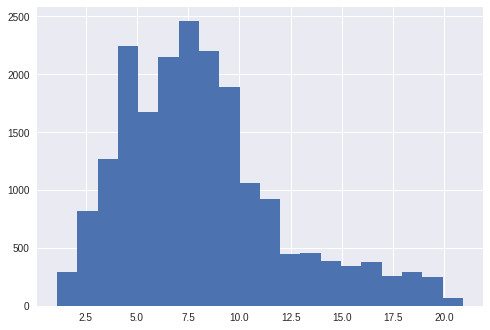

In [0]:
# Plot the histogram of the column with the method .hist(). 
# Also, include the argument bins=20 to get a more granular view
unemployment_merged['unemployment_rate'].hist(bins=20)

You should see a histogram similar to the next image:

>![Challenge 8](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/challenge8.png)

<a id='section6'></a>
## 6. GroupBy

What if we want to know how many missing values exist at the *country* level? We can take the main part of what we had above and create a new column in the `DataFrame`.

In [0]:
# Create a new column named unemployment_rate_null in unemployment_merged to 
# store if the column unemployment_rate is null by applying the .isnull()
# method on that column
unemployment_merged['unemployment_rate_null'] = unemployment_merged['unemployment_rate'].isnull()

To count the **number of missing values for each country,** we introduce the `.groupby()` method.

In [0]:
unemployment_merged.groupby('name_en')['unemployment_rate_null'].sum()

name_en
Austria                                        0.0
Belgium                                        0.0
Bulgaria                                     180.0
Croatia                                      216.0
Cyprus                                         0.0
Czech Republic                                 0.0
Denmark                                        0.0
Estonia                                        0.0
Finland                                        0.0
France                                         0.0
Germany (including  former GDR from 1991)      0.0
Greece                                         0.0
Hungary                                       36.0
Ireland                                        0.0
Italy                                          0.0
Latvia                                         0.0
Lithuania                                      0.0
Luxembourg                                     0.0
Malta                                        180.0
Netherlands            

Let's explain what just happened. We start with our `DataFrame`. We tell `pandas` that we want to group the data by country name&mdash;that's what goes in the parentheses. Next, we need to tell it what column we'd like to perform the `.sum()` operation on. In this case, it's the indicator for whether or not the unemployment rate was missing.

As we saw above, the number of records for each country differs. We might, then, want to have the **missing values by country shown as percentages.** Let's create a new `DataFrame` for this.

We'll take the code from above and set the `as_index` parameter to `False` to extract the index into a new column.

In [0]:
unemployment_rate = unemployment_merged.groupby('name_en', as_index=False)['unemployment_rate_null'].sum()

In [0]:
unemployment_rate.head()

,name_en,unemployment_rate_null
0,Austria,0.0
1,Belgium,0.0
2,Bulgaria,180.0
3,Croatia,216.0
4,Cyprus,0.0


Now, `unemployment_rate` is a `DataFrame` with the information of number of null unemployment rate entries per country. It's important to note that using `as_index=False` in `.groupby()` only works if the grouping column(s) are not the same as the columns on which we're performing the operation.

Also, to group by several columns, simply pass in a list of column names to `.groupby()`.

```
unemployment_merged.groupby(['name_en', 'seasonality'])['unemployment_rate'].mean()
```

Now, let's add the number of observations by country to the `DataFrame`.

In [0]:
unemployment_rate['n_obs'] = unemployment_merged.groupby('name_en')['name_en'].count().values

Here, we need to use the `values` attribute to get an array of the counts. Excluding `values` will result in a column full of `NaN`s. This is because the index in `unemployment.groupby('name_en')['name_en'].count()` is a list of the country names. When creating a new column, `pandas` tries to match on index. Recall that the default index values for a `DataFrame` is a sequence of integers.

Because we know (or have noticed) that the `.groupby()` function returns the values in alphabetical order, we can simply set the new column to the list of values, as we have done. You can, however, be more explicit and create another `DataFrame` and merge on country name.

Finally, let's create the column for the percentage of missing values.

In [0]:
unemployment_rate['null_percentage'] = unemployment_rate['unemployment_rate_null'] / unemployment_rate['n_obs']

In [0]:
unemployment_rate

,name_en,unemployment_rate_null,n_obs,null_percentage
0,Austria,0.0,648,0.000000
1,Belgium,0.0,1008,0.000000
2,Bulgaria,180.0,576,0.312500
3,Croatia,216.0,324,0.666667
4,Cyprus,0.0,396,0.000000
5,Czech Republic,0.0,468,0.000000
6,Denmark,0.0,1008,0.000000
7,Estonia,0.0,387,0.000000
8,Finland,0.0,828,0.000000
9,France,0.0,1008,0.000000


You can see how Croatia has the highest null employment entries percentage in our dataset with a 66.67% nulls rate.

### Challenge 9: GroupBy 

Find the average unemployment rate for European Union vs. non-European Union countries. 

1. use `groupby` to group on "country_group"
2. select the "unemployment_rate" column
3. use `.mean()` to get the average

In [0]:
# Merge in the unemployment_merged DataFrame and the country_names DataFrame
# into the unemployment DataFrame
unemployment = pd.merge(unemployment_merged, country_names[['country','country_group']], on='country')

# Aggregate the unemployment_rate of the unemployment DataFrame
# by country_group and apply the mean() method
unemployment.groupby('country_group')['unemployment_rate'].mean()

country_group
eu        8.303382
non-eu    6.080616
Name: unemployment_rate, dtype: float64

You should find that EU countries have an average of 8.30% unemployment rate vs the 6.08% of non-EU countries.

<a id='section7'></a>
## 7. Exporting A DataFrame to csv

As we can see above, Croatia has lots of missing data. This `DataFrame` contains useful information&mdash;things to consider&mdash;when analyzing the data.

Suppose we wanted to save this as a .csv file. For this, we'd use the `.to_csv()` method.

In [0]:
unemployment_rate.to_csv('unemployment_rate.csv')
files.download("unemployment_rate.csv")

Open your file. By default, this method writes the indices. We probably don't want that. Let's edit the code. Let's also be explicit about the type of delimiter we're interested in. (Values can be separated by pipes (`|`), semicolons (`;`), tabs (`\t`), etc.)

In [0]:
unemployment_rate.to_csv('unemployment_missing.csv', index=False, sep=';')
files.download("unemployment_missing.csv")

Much better!

Let's return to our main `DataFrame`. Now that we have the missing values information in `unemployment_rate`, we can **drop the last column** we added to `unemployment`.

In [0]:
# Drop the unemployment_rate_null column with the drop() method in 
# the unemployment DataFrame.
unemployment.drop('unemployment_rate_null', axis=1, inplace=True)

It's important to specify the `axis` parameter. `axis=1` refers to columns (`axis=0` refers to rows.) The parameter `inplace=True` simply modifies the actual `DataFrame` rather than returning a new `DataFrame`.

In [0]:
# Print the first rows of the unemployment DataFrame
unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,c_code,name_en,country_group
0,at,nsa,1993.01,1993,1,171000,4.5,at,Austria,eu
1,at,nsa,1993.02,1993,2,175000,4.6,at,Austria,eu
2,at,nsa,1993.03,1993,3,166000,4.4,at,Austria,eu
3,at,nsa,1993.04,1993,4,157000,4.1,at,Austria,eu
4,at,nsa,1993.05,1993,5,147000,3.9,at,Austria,eu


Your unemployment `DataFrame` should look like this:

>![Exporting a DataFrame](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/exporting-dataframes.jpg)

<a id='section8'></a>
## 8. Dealing With Missing Values: Boolean Indexing

Now that we know about the missing values, we have to deal with them. There are two main options:

* Fill the missing values with some other values.
* Do not use observations with missing values.
    * Depending on the analysis, we may want to exclude entire countries.
    
Because countries with missing unemployment rate data have at least 36 missing values, which is too many to fill, we'll take the second approach and **exclude missing values** from our primary analyses.

Instead of just getting rid of that data, it might make sense to store it in a separate `DataFrame`. This way, we could answer questions such as, "do missing values occur during certain months (or years) more frequently?" With this, we will introduce the concept of *boolean indexing* for filtering data.

In [0]:
unemployment_rate_missing = unemployment[unemployment['unemployment_rate'].isnull()]

Recall that `unemployment['unemployment_rate'].isnull()` produces an array of boolean values that we use to filter the unemployment `DataFrame`. We used this previously when counting the number of missing values, though we did not see its output. Let's see some of that now.

In [0]:
unemployment['unemployment_rate'].isnull()[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: unemployment_rate, dtype: bool

To create `unemployment_rate_missing`, we're indexing `unemployment` with the array above. This returns only the rows where the value in the array is `True`. Let's see if it worked.

In [0]:
unemployment_rate_missing.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,c_code,name_en,country_group
1656,bg,nsa,1995.01,1995,1,391000,NaN,bg,Bulgaria,eu
1657,bg,nsa,1995.02,1995,2,387000,NaN,bg,Bulgaria,eu
1658,bg,nsa,1995.03,1995,3,378000,NaN,bg,Bulgaria,eu
1659,bg,nsa,1995.04,1995,4,365000,NaN,bg,Bulgaria,eu
1660,bg,nsa,1995.05,1995,5,346000,NaN,bg,Bulgaria,eu


It is also possible to specify multiple conditions using the `&` operator, but each condition needs to be inside of parentheses. The `.isin()` method, which takes a `list` of values, is useful when you're interested in conditioning on multiple values on a given column. For example, if you want to select multiple countries.

Now, we're ready to remove the missing data in `unemployment`. To do this, we can use the `.dropna()` method.

In [0]:
unemployment.dropna(subset=['unemployment_rate'], inplace=True)

(Note that while we have dropped all observations for which `unemployment_rate == NaN`, this doesn't mean that all of our observations overlap exactly in time. We may find that there are dates where we have data for one country and no data for others.)

### Challenge 10: Boolean Indexing
Suppose we only want to look at unemployment data from the year 2000 or later. Use **Boolean indexing** to create a DataFrame with only these years.

1. Select the "year" column from `unemployment`
2. Using the year data, create a **mask**: an array of Booleans where each value is True if and only if the year is 2000 or later. Remember, you can use Boolean operators like `>`, `<`, and `==` on a column
3. Use the mask from step 2 to index `unemployment`

In [0]:
# select the year column from unemployment and store it 
# in a new variable called 'year'
year = unemployment['year']

# create a mask where year >= 2000
later_or_equal_2000 = year >= 2000

# Use the Boolean index on the unemployment DataFrame and store
# in the variable unemployment_2000later the result
unemployment_2000later = unemployment[later_or_equal_2000]

# Print the first few rows of unemployment_2000later
unemployment_2000later.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,c_code,name_en,country_group
84,at,nsa,2000.01,2000,1,182000,4.7,at,Austria,eu
85,at,nsa,2000.02,2000,2,190000,4.9,at,Austria,eu
86,at,nsa,2000.03,2000,3,171000,4.5,at,Austria,eu
87,at,nsa,2000.04,2000,4,148000,3.9,at,Austria,eu
88,at,nsa,2000.05,2000,5,133000,3.5,at,Austria,eu


The result of your `unemployment_2000later` `DataFrame` should look like this:

> ![Challenge 10](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/challenge10.jpg)

<a id='section9'></a>
## 9. Sorting Values

At this point, you might be curious to know what the highest unemployment rates were. For this, we'll use the `DataFrame.sort_values()` method to **sort the data.**

In [0]:
unemployment.sort_values('unemployment_rate', ascending=False)[:5]

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,c_code,name_en,country_group
15526,pl,nsa,2004.02,2004,2,3531000,20.9,pl,Poland,eu
15525,pl,nsa,2004.01,2004,1,3520000,20.7,pl,Poland,eu
15514,pl,nsa,2003.02,2003,2,3460000,20.7,pl,Poland,eu
5663,es,sa,2010.09,2010,9,4773000,20.6,es,Spain,eu
15527,pl,nsa,2004.03,2004,3,3475000,20.6,pl,Poland,eu


The above code creates a copy of the `DataFrame`, sorted in *descending* order, and prints the first five rows, without assigning that result to any `DataFrame`.

You may have noticed that the data set includes a `seasonality` column, which we haven't yet discussed. The unemployment rate in this data is actually calculated in three separate ways. Let's look at the values.

In [0]:
unemployment['seasonality'].unique()

array(['nsa', 'sa', 'trend'], dtype=object)

The three options above correspond to:

* not seasonally adjusted
* seasonally adjusted
* trend cycle

We'll stick with seasonally adjusted data so that the values are more comparable. Let's look at the highest unemployment rates in this context.

In [0]:
unemployment[unemployment['seasonality'] == 'sa'].sort_values('unemployment_rate', ascending=False)[:5]

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,c_code,name_en,country_group
5664,es,sa,2010.10,2010,10,4758000,20.6,es,Spain,eu
5663,es,sa,2010.09,2010,9,4773000,20.6,es,Spain,eu
5662,es,sa,2010.08,2010,8,4739000,20.5,es,Spain,eu
5665,es,sa,2010.11,2010,11,4723000,20.4,es,Spain,eu
15702,pl,sa,2002.10,2002,10,3471000,20.3,pl,Poland,eu


Spain has the highest seasonally adjusted unemployment rate.

### Challenge 11: Sorting based on multiple columns
Sometimes you may need to sort based on more than one column, in ascending or descending orders, and are interested only in a subset of the `DataFrame` columns. Let's try with some sorting and boolean indexing to get the summer unemployment rates of the eu countries, ordered by time.

1. Create three different boolean indices to select only:
  * EU countries
  * Summer months (June, July and August)
  * Seasonally adjusted unemployment rates
2. Store the result in a new `DataFrame` called "filtered_unemployment" and print the first 5 rows.
3. Using only the columns "name_en", "month", "year" and "unemployment_rate", sort the "filtered_unemployment" `DataFrame` by year, montn and country name with ascending order. Look at the result image to make sure that the column order and the sorting is identical to yours.


In [0]:
# Create the three boolean indices
eu_idx = unemployment['country_group'] == 'eu'
summer_idx = unemployment['month'].isin([6,7,8])
seasonality_idx = unemployment['seasonality'] == 'sa'

# Use the boolean indices to filter the unemployment DataFrame into the
# new DataFrame filtered_unemployment
filtered_unemployment = unemployment[(eu_idx & summer_idx & seasonality_idx)]

# Print the first 5 rows of filtered_unemployment
filtered_unemployment.head()

,country,seasonality,year_month,year,month,unemployment,unemployment_rate,c_code,name_en,country_group
221,at,sa,1993.06,1993,6,152000,4.0,at,Austria,eu
222,at,sa,1993.07,1993,7,154000,4.0,at,Austria,eu
223,at,sa,1993.08,1993,8,154000,4.1,at,Austria,eu
233,at,sa,1994.06,1994,6,145000,3.8,at,Austria,eu
234,at,sa,1994.07,1994,7,145000,3.8,at,Austria,eu


Your datafram should look like this at this point:

>![Challenge 11-1](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/challenge11-1.jpg)

In [0]:
# Sort the filtered_unemployment by year, month and name_en in ascending order. 
# Print only the FIRST 5 rows of the columns name_en, month, year and 
# unemployment_rate in that order
filtered_unemployment[['name_en','month','year','unemployment_rate']].\
          sort_values(['year','month','name_en'], 
                      ascending=[True, True, True])[:5]

,name_en,month,year,unemployment_rate
989,Belgium,6,1983,10.7
3941,Denmark,6,1983,8.5
7172,France,6,1983,7.6
9530,Ireland,6,1983,13.9
10538,Italy,6,1983,7.3


The first 5 rows should be like these:
>![Challenge11-2](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/challenge11-2.jpg)

In [0]:
# Sort the filtered_unemployment by year, month and name_en in ascending order. 
# Print only the LAST 5 rows of the columns name_en, month, year and 
# unemployment_rate in that order
filtered_unemployment[['name_en','month','year','unemployment_rate']].\
          sort_values(['year','month','name_en'], 
                      ascending=[True, True, True])[-5:]

,name_en,month,year,unemployment_rate
19387,Slovakia,8,2010,14.4
18811,Slovenia,8,2010,7.3
5662,Spain,8,2010,20.5
18091,Sweden,8,2010,8.2
20459,United Kingdom,8,2010,7.7


The last 5 rows should be like these:
>![Challenge11-3](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/challenge11-3.jpg)

<a id='section10'></a>
## 10. Plotting With Pandas

The best way to get a sense of this data is to **plot it.** Next, we'll start to look at some basic plotting with `pandas`. Before we begin, let's sort the data by country and date. This is good practice and is especially important when using `pandas`'s `.plot()` method because the x-axis values are based on the indices so the graph could make no sense at all if it's not ordered. When we sort, the index values remain unchanged. Thus, we need to reset them. The `drop` parameter tells `pandas` to construct a `DataFrame` *without* adding a column.

In [0]:
unemployment.sort_values(['name_en', 'year_month'], inplace=True)
unemployment.reset_index(drop=True, inplace=True)

Let's take a look at Spain's unemployment rate (only because it was the highest) across time.

In [0]:
spain = unemployment[(unemployment['name_en'] == 'Spain') &
                     (unemployment['seasonality'] == 'sa')]

We'll use the `plot()` method changing the attributes of figure size and line color via their arguments. Note that we use a semicolon (**;**) at the end of the line, to avoid printing the name of the object that is returned when we execute that line.

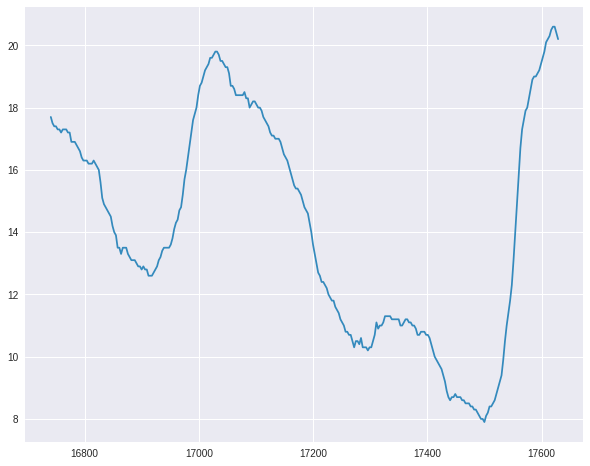

In [0]:
spain['unemployment_rate'].plot(figsize=(10, 8), color='#348ABD');

Note that the values along the x-axis represent the indices associated with Spain in the sorted `unemployment` `DataFrame`. Wouldn't it be nice if, instead, we could **show the time period** associated with the various unemployment rates for Spain? It might also be interesting to **compare** Spain's unemployment rate with its neighbor to the west, Portugal.

Let's first create a `DataFrame` that contains the unemployment data for both countries.

In [0]:
ps = unemployment[(unemployment['name_en'].isin(['Portugal', 'Spain'])) &
                  (unemployment['seasonality'] == 'sa')]

Next, we'll **generate time series data** by converting our years and months into `datetime` objects. `pandas` provides a `to_datetime()` function that makes this relatively simple. It converts an argument&mdash;a single value or an array of values&mdash;to `datetime`. (Note that the return value [depends on the input](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).) If we were interested in March 23, 1868, for example, we could do the following.

In [0]:
pd.to_datetime('1868/3/23')

Timestamp('1868-03-23 00:00:00')

The argument doesn't necessarily have to be specified in the `yyyy/mm/dd` format. You could list it as `mm/dd/yyyy`, but it's a good idea to be explicit. As a result, we pass in a valid string format.

In [0]:
pd.to_datetime('3/23/1868', format='%m/%d/%Y')

Timestamp('1868-03-23 00:00:00')

Let's create the `datetime` object and add it to the `DataFrame` as a column named `date`. For this, we'll use the `DataFrame.insert()` method.

In [0]:
ps.insert(loc=0, column='date',
          value=pd.to_datetime(ps['year'].astype(str) + '/' +
                               ps['month'].astype(str) + '/1'))

Finally, let's only keep certain columns, rename them, and reshape the `DataFrame`. With the `pivot()` method we can convert the single values of an Index or column, in our case "Country" into different columns.

In [0]:
ps = ps[['date', 'name_en', 'unemployment_rate']]
ps.columns = ['Time Period', 'Country', 'Unemployment Rate']
ps = ps.pivot(index='Time Period', columns='Country', 
              values='Unemployment Rate')
ps.head()

Country,Portugal,Spain
Time Period,,
1983-01-01,7.5,NaN
1983-02-01,7.6,NaN
1983-03-01,7.7,NaN
1983-04-01,7.9,NaN
1983-05-01,8.0,NaN


In [0]:
ps.tail()

Country,Portugal,Spain
Time Period,,
2010-08-01,11.1,20.5
2010-09-01,11.1,20.6
2010-10-01,11.0,20.6
2010-11-01,10.9,20.4
2010-12-01,10.9,20.2


Notice the indices.

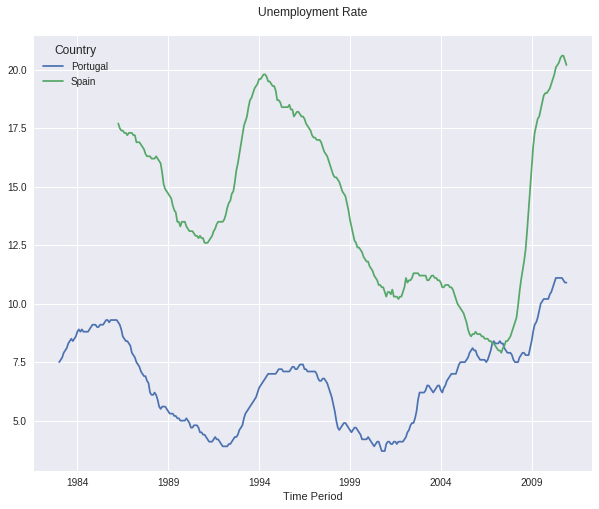

In [0]:
ps.plot(figsize=(10, 8), title='Unemployment Rate\n');

### Challenge 12: Plot without missing values
Note that there are some dates for which we lack data on Spain's unemployment rate. What could you do if you wanted your plot to show only dates where both Spain and Portugal have a defined unemployment rate?

In [0]:
# Create a new DataFrame without rows that have NaN values. 
# Print the shape property to check the shape of that DataFrame
ps_nomissing = ps.dropna()
ps_nomissing.shape

(297, 2)

In [0]:
ps.shape

(336, 2)

You must have seen that, dropping NAs, we end up with a `DataFrame` with 297 rows and 2 columns, as oposed to the original `DataFrame` from above, that had 336 rows and 2 columns.

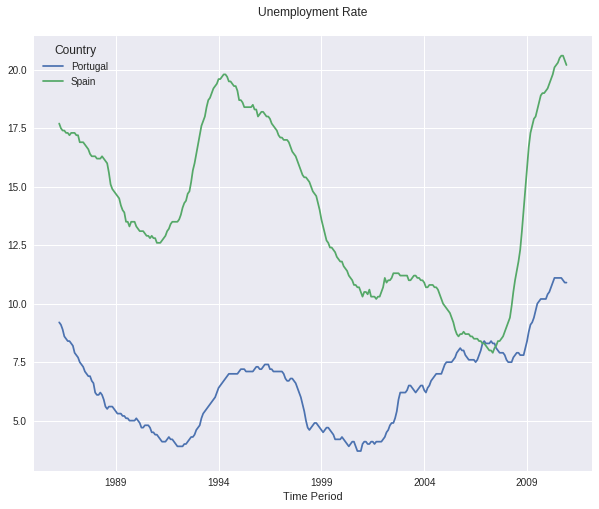

In [0]:
# Plot the DataFrame just created with no missing values
ps_nomissing.plot(figsize=(10, 8), title='Unemployment Rate\n');

Your plot should look like this:

>![Challenge 12](https://raw.githubusercontent.com/oxanozaep/pandas_learning/master/images/Spain-Portugal_plot.png)